In [1]:
import yfinance as yf
import pandas as pd

# List of stock tickers
tickers = ["AAPL", "MSFT", "GOOGL"]

# Fetching historical stock data for each ticker
stock_data_dict = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
    stock_data.to_csv(f'{ticker}_historical_data.csv')
    stock_data_dict[ticker] = stock_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data Preprocessing and Exploration

In [3]:
for ticker, data in stock_data_dict.items():
  print(f"Data for {ticker}:")
  print(data.head())


Data for AAPL:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358410  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400682  447610800
Data for MSFT:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  30.620001  31.100000  30.590000  30.950001  23.389399  38409100
2010-01-05  30.850000  31.100000  30.639999  30.959999  23.396957  49749600
2010-01-06  30.879999  31.080000  30.520000  30.770000  23.253374  58182400
2010-01-07  30.629999  30.700001  30.190001  30.450001  23.011543  50559700
201


Correlation Matrix:
           AAPL      MSFT     GOOGL
AAPL   1.000000  0.597661  0.564578
MSFT   0.597661  1.000000  0.651818
GOOGL  0.564578  0.651818  1.000000


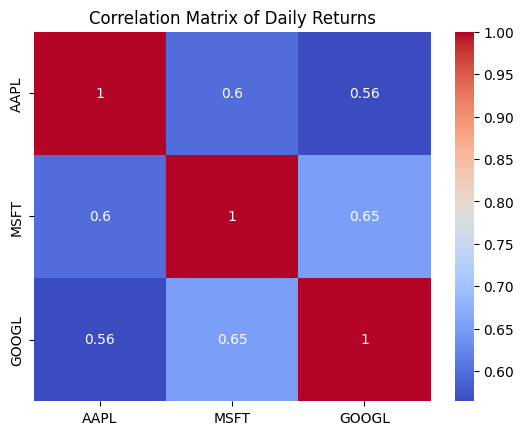

In [4]:
# Calculate daily returns for each stock
import matplotlib.pyplot as plt

daily_returns = pd.DataFrame()
for ticker, data in stock_data_dict.items():
    daily_returns[ticker] = data['Adj Close'].pct_change()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Returns')
plt.show()


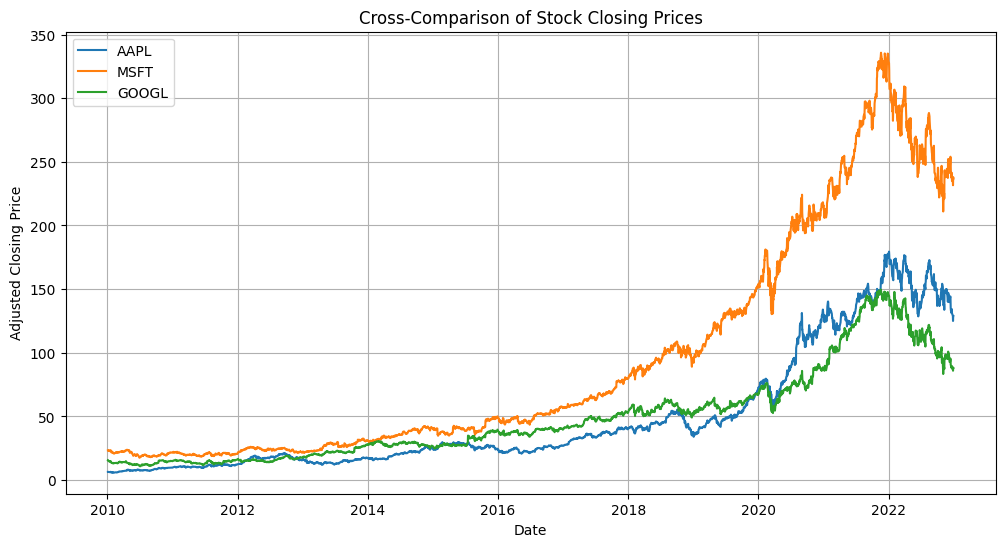

In [5]:
# visualize how the closing prices of these stocks compare over time
plt.figure(figsize=(12, 6))
for ticker, data in stock_data_dict.items():
    plt.plot(data['Adj Close'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Cross-Comparison of Stock Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

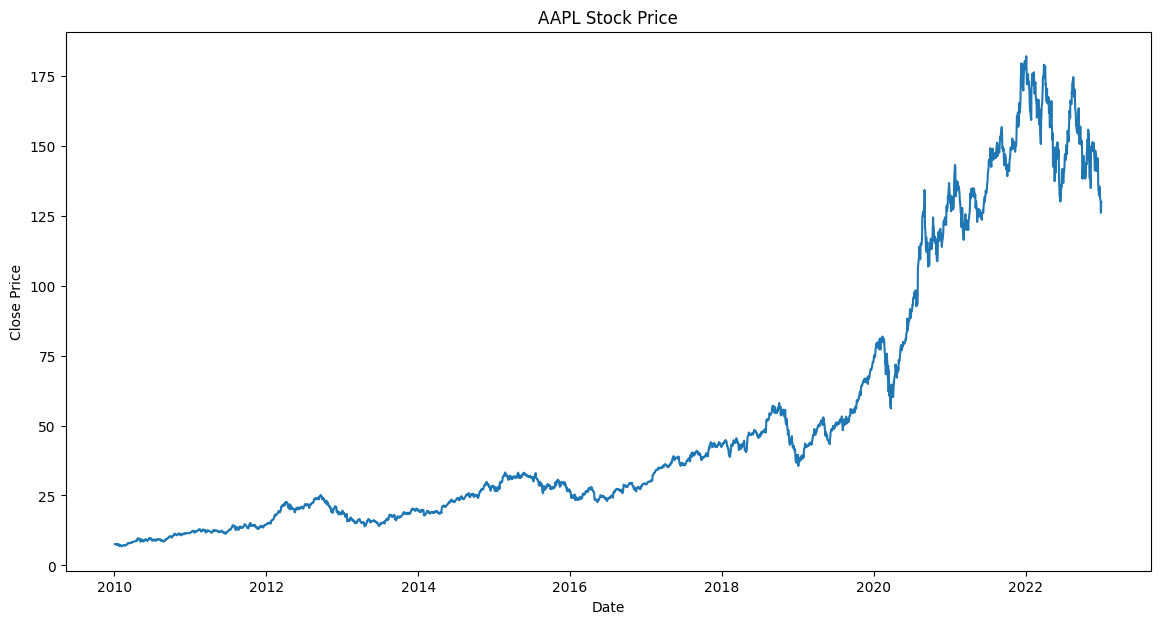

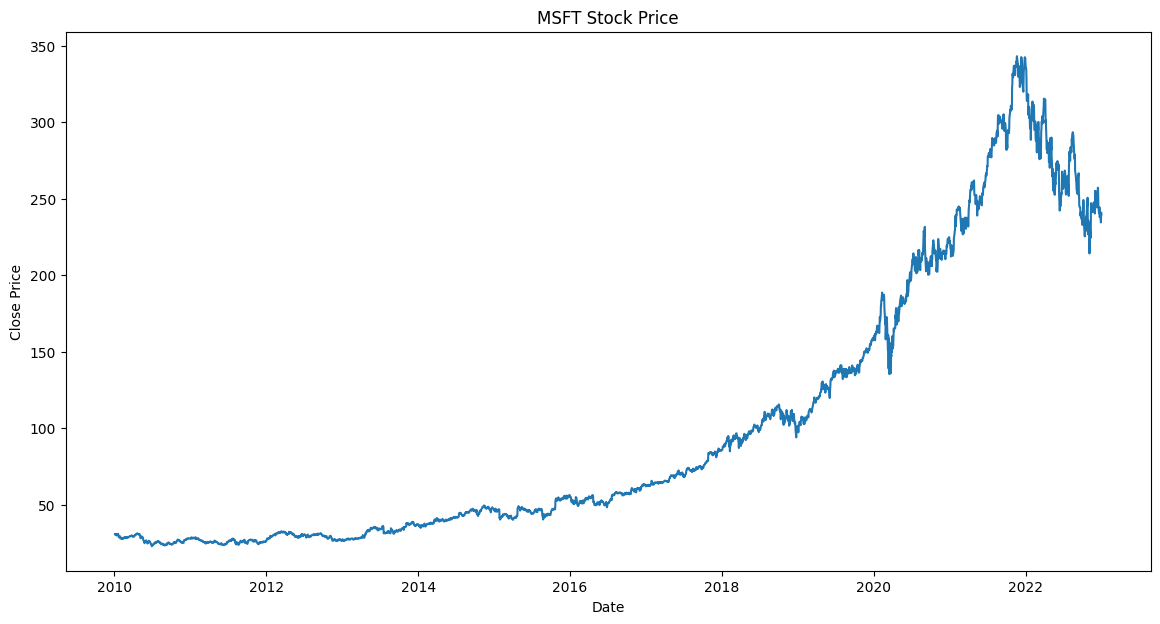

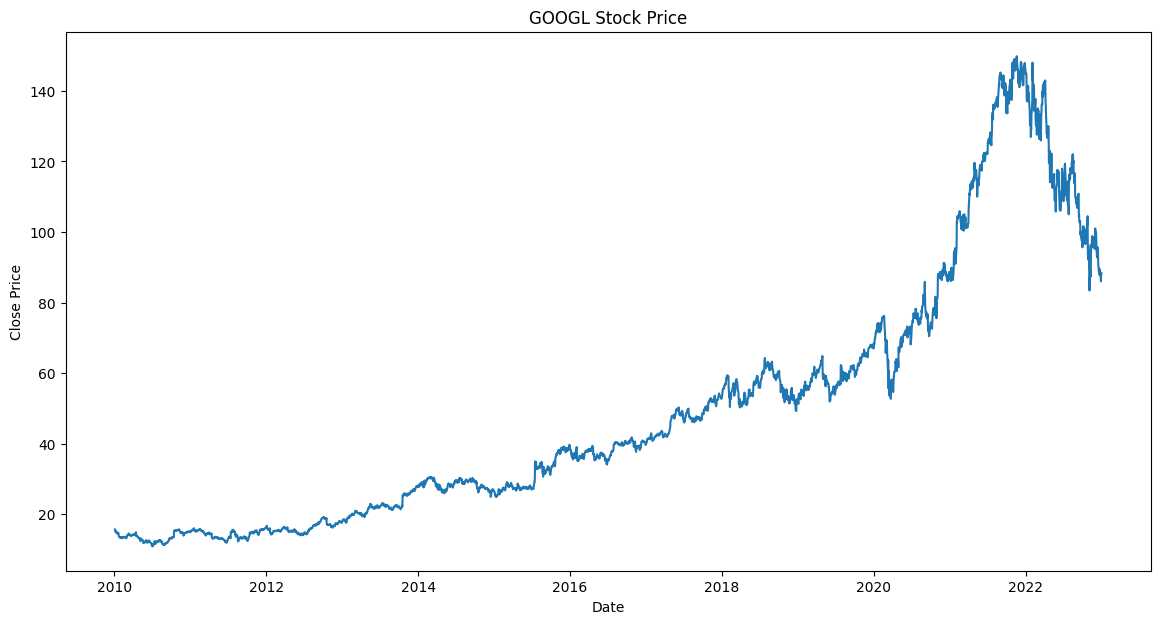

In [2]:
import matplotlib.pyplot as plt

# Data preprocessing for each stock
processed_data_dict = {}
for ticker, data in stock_data_dict.items():
    data.dropna(inplace=True)
    processed_data_dict[ticker] = data

    # Exploratory Data Analysis (EDA)
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'])
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

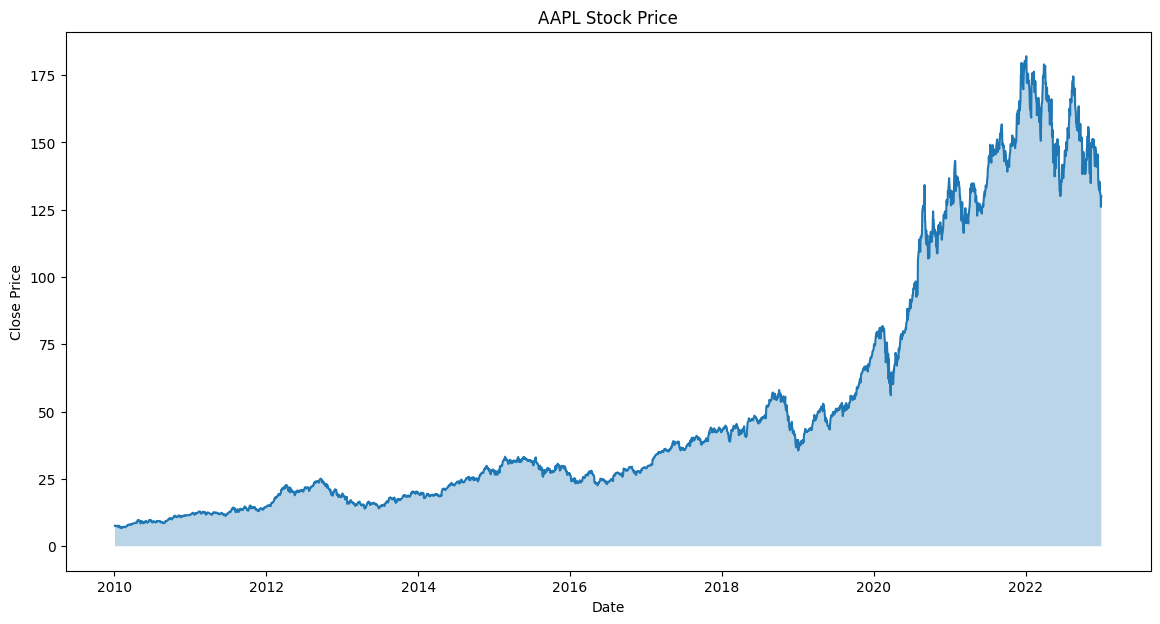

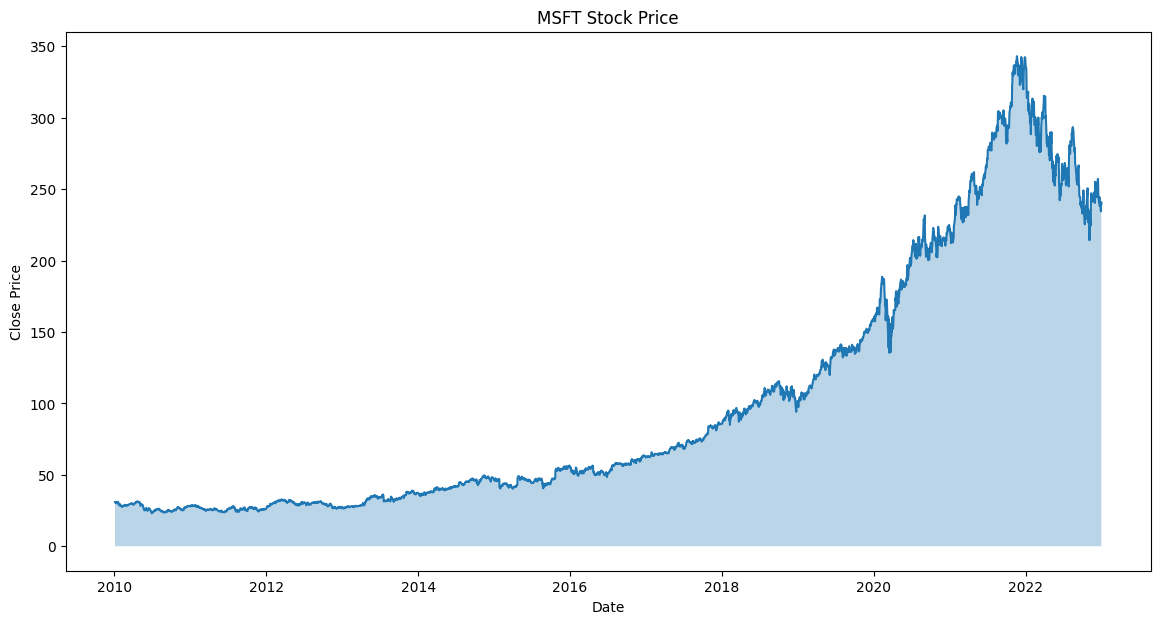

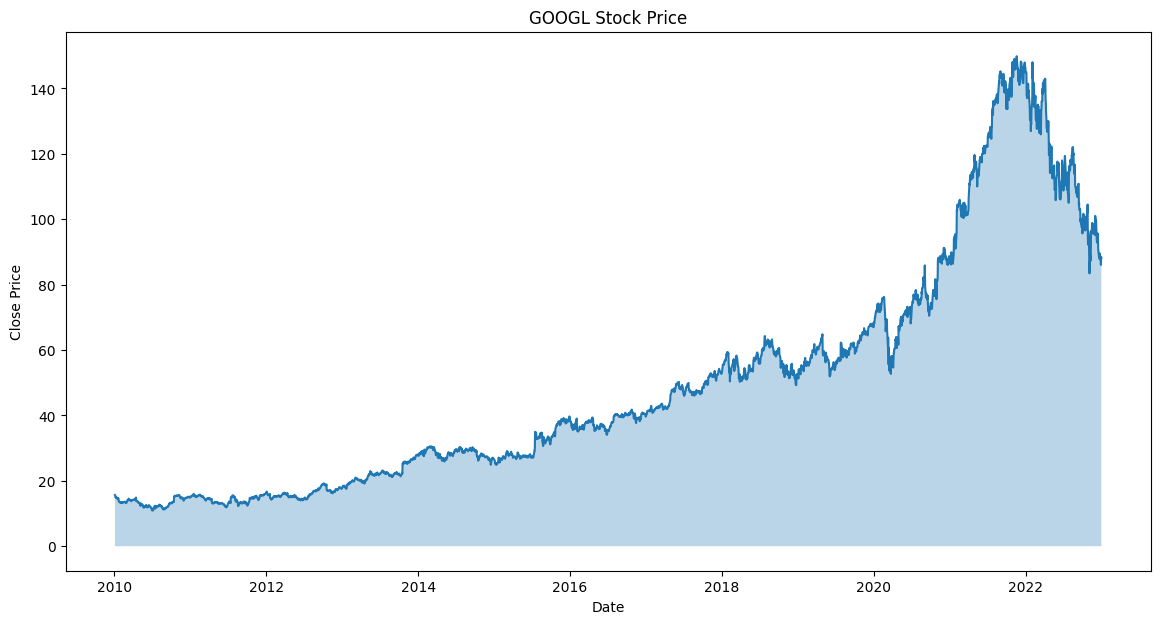

In [6]:
# Data preprocessing for each stock
processed_data_dict = {}
for ticker, data in stock_data_dict.items():
    data.dropna(inplace=True)
    processed_data_dict[ticker] = data

    # Exploratory Data Analysis (EDA)
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'])
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.fill_between(data.index, data['Close'], alpha=0.3) # fill curves
    plt.show()


In [7]:
# Assuming you want to check for imbalance in the daily returns
for ticker, data in processed_data_dict.items():
  # Calculate the number of positive and negative returns
  positive_returns = (data['Adj Close'].pct_change() > 0).sum()
  negative_returns = (data['Adj Close'].pct_change() < 0).sum()

  # Print the counts and the ratio
  print(f"For {ticker}:")
  print(f"Positive Returns: {positive_returns}")
  print(f"Negative Returns: {negative_returns}")
  print(f"Ratio (Positive/Negative): {positive_returns / negative_returns:.2f}\n")


For AAPL:
Positive Returns: 1722
Negative Returns: 1544
Ratio (Positive/Negative): 1.12

For MSFT:
Positive Returns: 1702
Negative Returns: 1541
Ratio (Positive/Negative): 1.10

For GOOGL:
Positive Returns: 1713
Negative Returns: 1556
Ratio (Positive/Negative): 1.10



Model Implementation

ARIMA Model

In [13]:
import warnings
warnings.filterwarnings('ignore')


In [14]:
from statsmodels.tsa.arima.model import ARIMA

arima_forecasts = {}
for ticker, data in processed_data_dict.items():
    arima_model = ARIMA(data['Close'], order=(5, 1, 0))
    arima_result = arima_model.fit()
    arima_forecasts[ticker] = arima_result.forecast(steps=30)


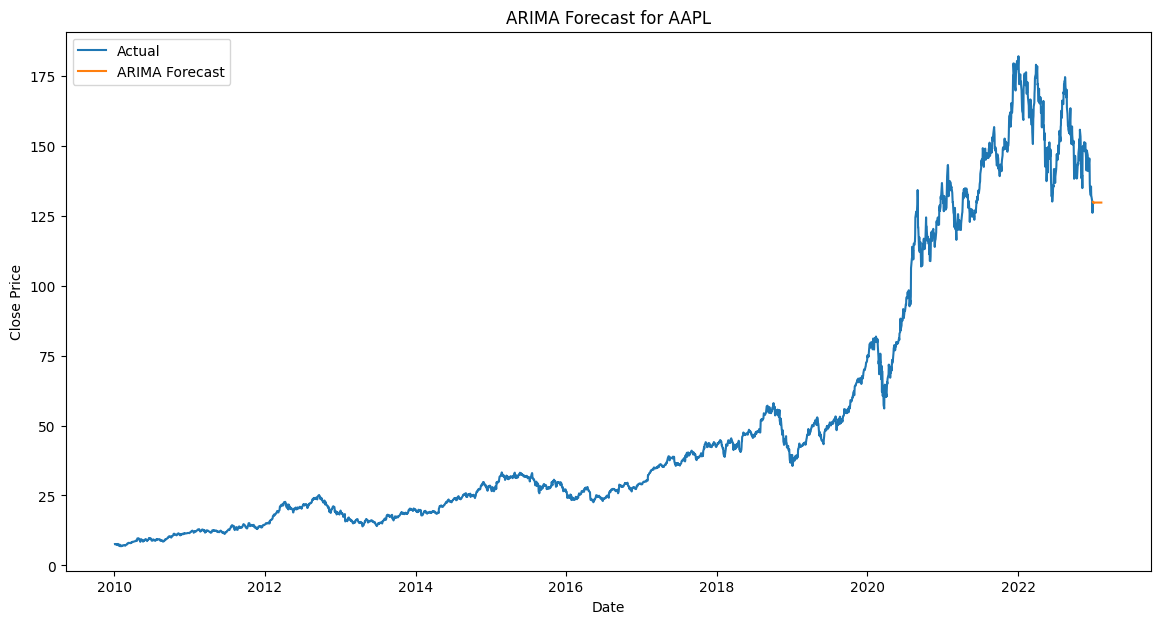

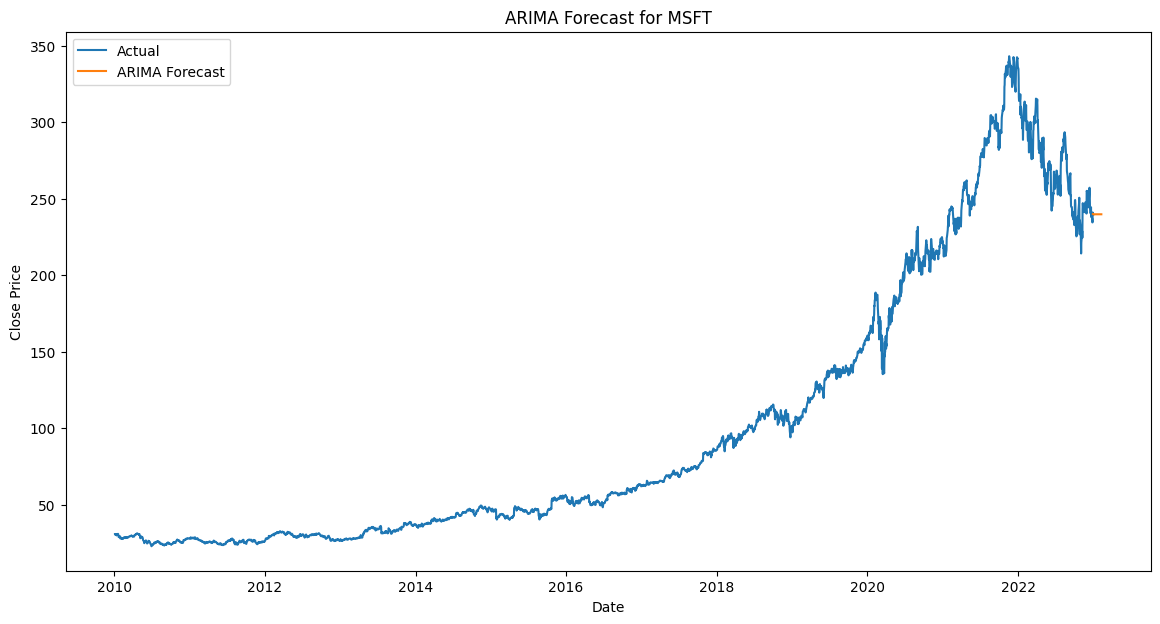

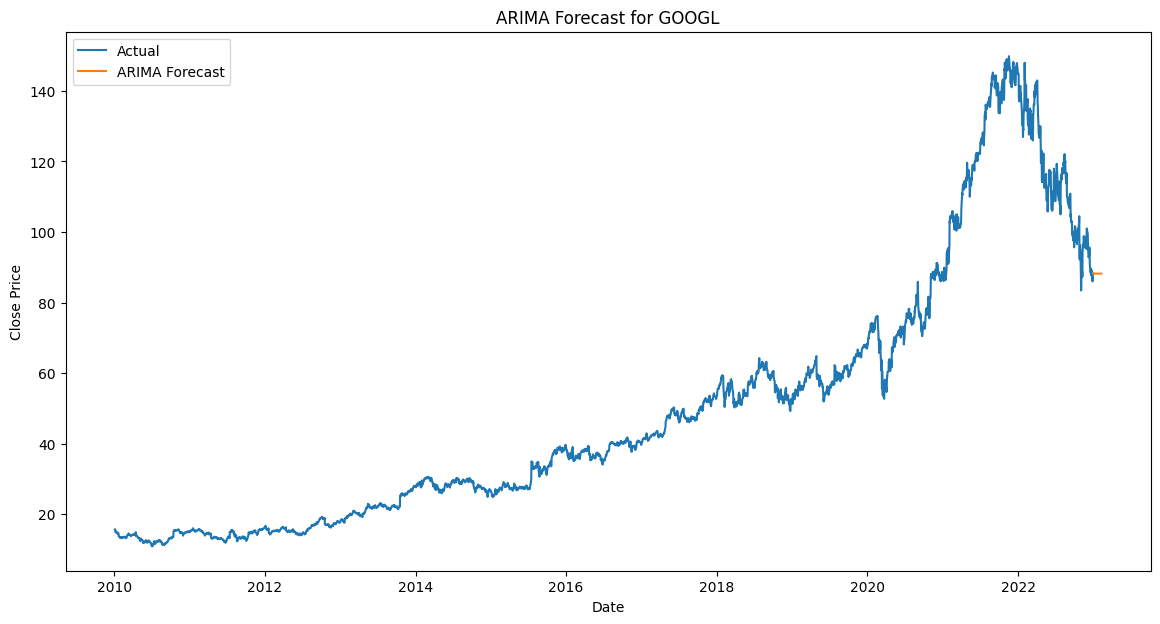

In [15]:
for ticker, data in processed_data_dict.items():
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Actual')
    plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), arima_forecasts[ticker], label='ARIMA Forecast')
    plt.title(f'ARIMA Forecast for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

SARIMA

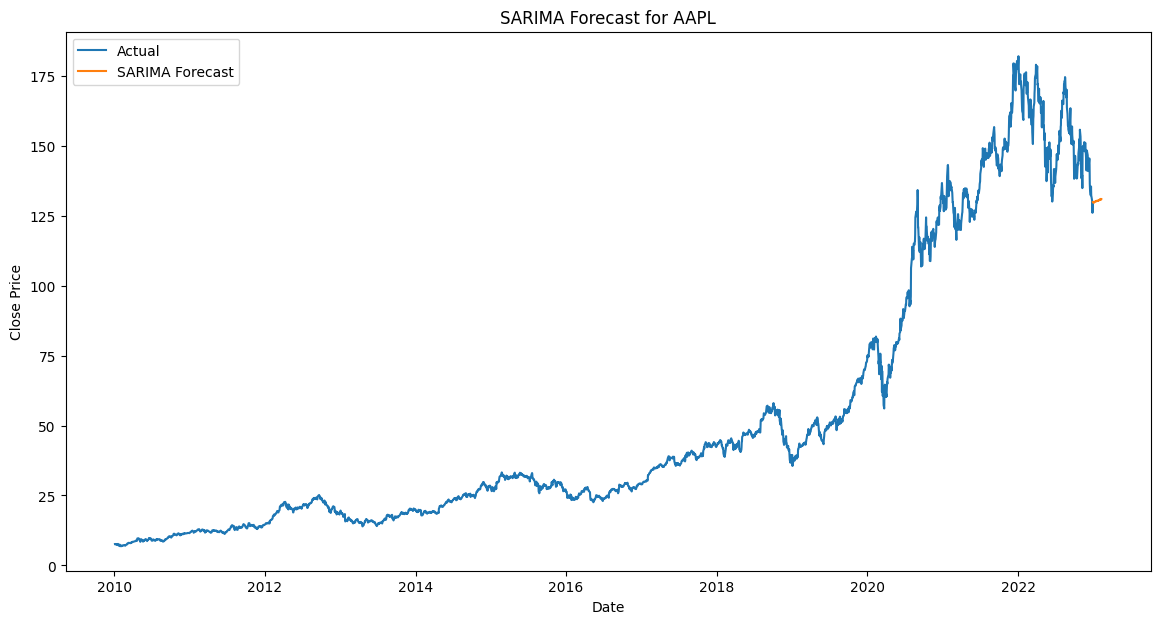

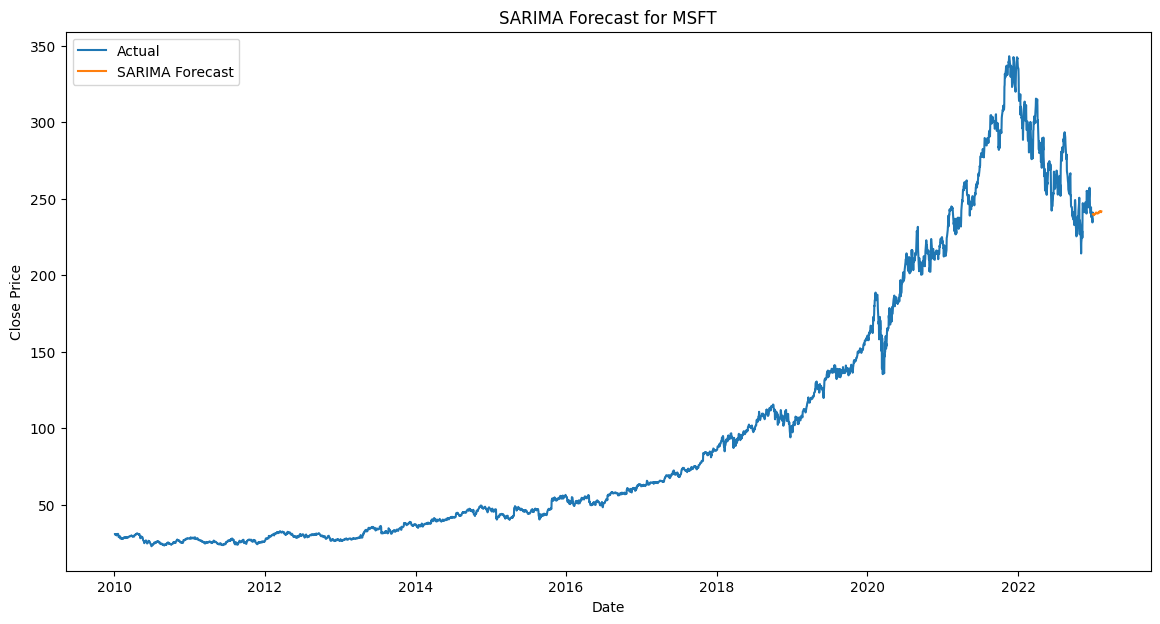

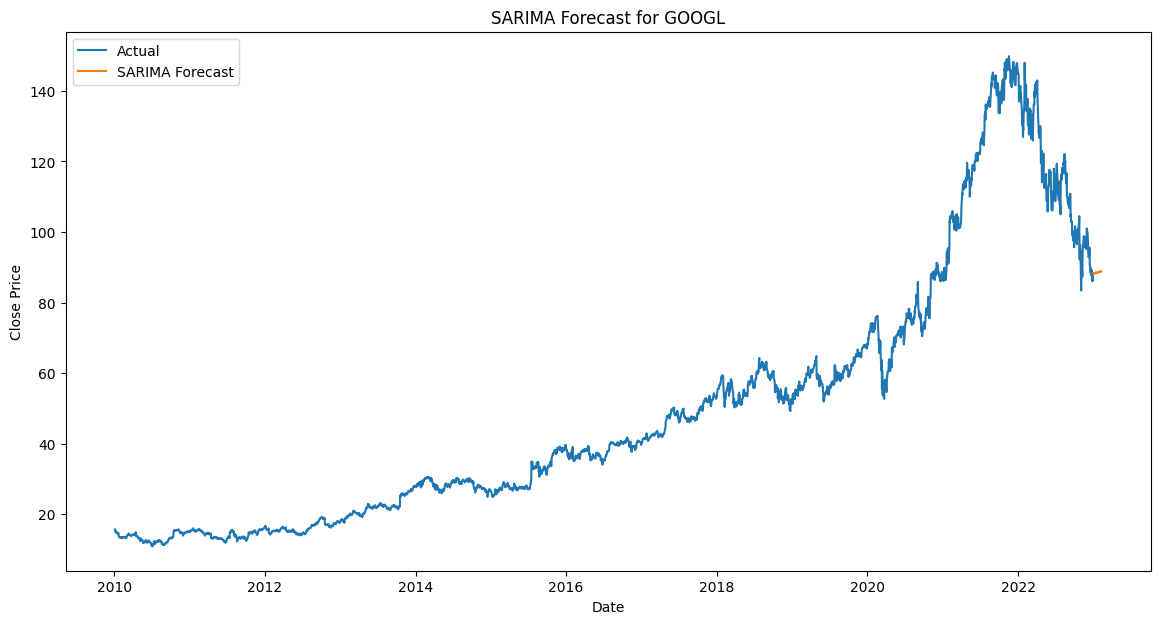

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_forecasts = {}
for ticker, data in processed_data_dict.items():
    sarima_model = SARIMAX(data['Close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    sarima_result = sarima_model.fit()
    sarima_forecasts[ticker] = sarima_result.forecast(steps=30)

for ticker, data in processed_data_dict.items():
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Actual')
    plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), sarima_forecasts[ticker], label='SARIMA Forecast')
    plt.title(f'SARIMA Forecast for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()


LSTM Model

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

lstm_forecasts = {}

for ticker, data in processed_data_dict.items():
    # Prepare data for LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    # Create training and testing datasets
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    # Function to create dataset in time series format
    def create_dataset(dataset, time_step=1):
        X, Y = [], []
        for i in range(len(dataset) - time_step - 1):
            a = dataset[i:(i + time_step), 0]
            X.append(a)
            Y.append(dataset[i + time_step, 0])
        return np.array(X), np.array(Y)

    time_step = 60
    X_train, Y_train = create_dataset(train_data, time_step)
    X_test, Y_test = create_dataset(test_data, time_step)

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Define and fit the LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    lstm_model.add(LSTM(50, return_sequences=False))
    lstm_model.add(Dense(25))
    lstm_model.add(Dense(1))

    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    lstm_model.fit(X_train, Y_train, batch_size=1, epochs=1)

    # Forecast
    train_predict = lstm_model.predict(X_train)
    test_predict = lstm_model.predict(X_test)

    # Inverse transform to get actual values
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    lstm_forecasts[ticker] = test_predict

19/19 [==============================] - 0s 16ms/step


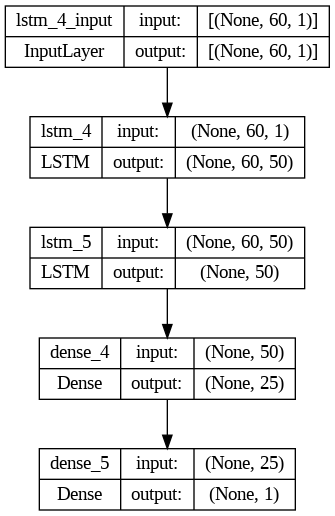

In [24]:
from keras.utils import plot_model

# Plot the model architecture
plot_model(lstm_model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True)

Model Training and Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

evaluation_results = {}

for ticker, data in processed_data_dict.items():
    # ARIMA Evaluation
    arima_mae = mean_absolute_error(data['Close'][-30:], arima_forecasts[ticker])
    arima_rmse = np.sqrt(mean_squared_error(data['Close'][-30:], arima_forecasts[ticker]))

    # LSTM Evaluation
    lstm_mae = mean_absolute_error(data['Close'][-len(lstm_forecasts[ticker]):], lstm_forecasts[ticker])
    lstm_rmse = np.sqrt(mean_squared_error(data['Close'][-len(lstm_forecasts[ticker]):], lstm_forecasts[ticker]))

    # Store evaluation results
    evaluation_results[ticker] = {
        'ARIMA': {'MAE': arima_mae, 'RMSE': arima_rmse},
        'LSTM': {'MAE': lstm_mae, 'RMSE': lstm_rmse}
    }

# Print evaluation results
for ticker, metrics in evaluation_results.items():
    print(f"Evaluation results for {ticker}:")
    for model, results in metrics.items():
        print(f"{model} - MAE: {results['MAE']}, RMSE: {results['RMSE']}")

Evaluation results for AAPL:
ARIMA - MAE: 11.48758356611324, RMSE: 13.550335664709184
LSTM - MAE: 4.105734160452178, RMSE: 5.182858975872575
Evaluation results for MSFT:
ARIMA - MAE: 6.239739796653521, RMSE: 8.188706726034075
LSTM - MAE: 31.86746798942386, RMSE: 33.64900219945139
Evaluation results for GOOGL:
ARIMA - MAE: 5.862302514987913, RMSE: 7.181520245735813
LSTM - MAE: 8.077023528641723, RMSE: 9.218974685506172


Performance Comparison and Analysis

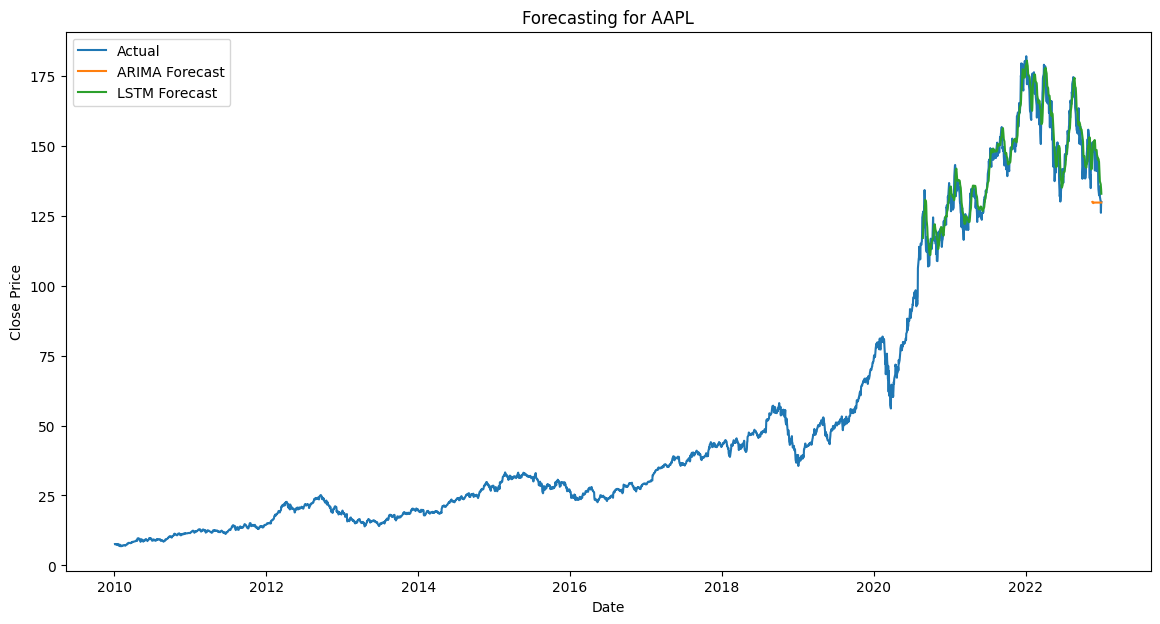

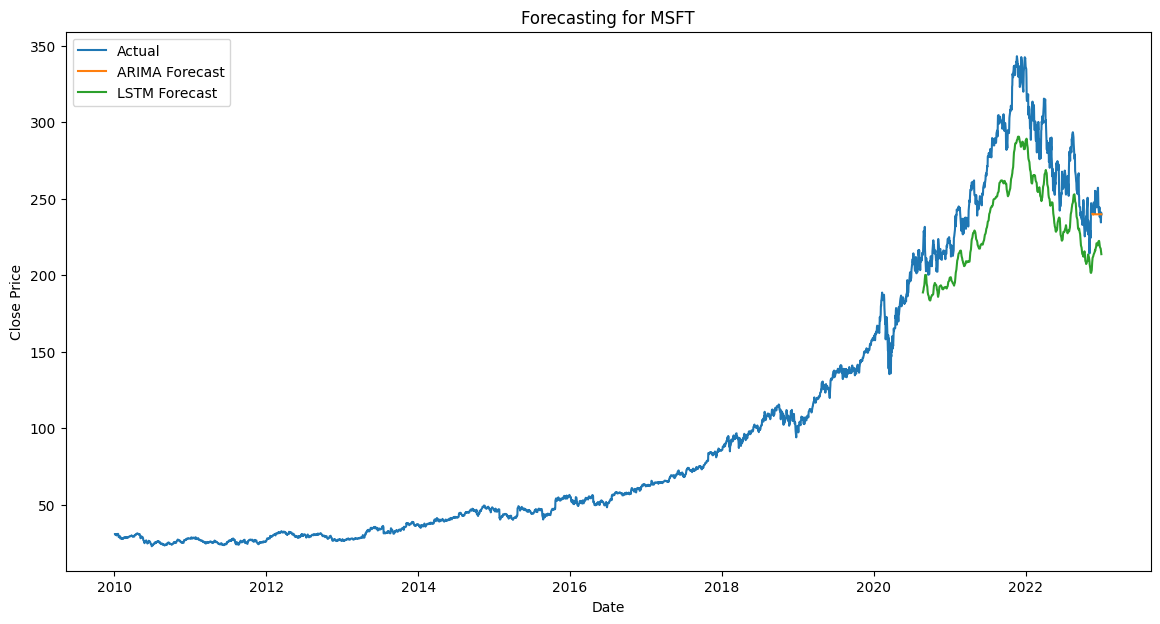

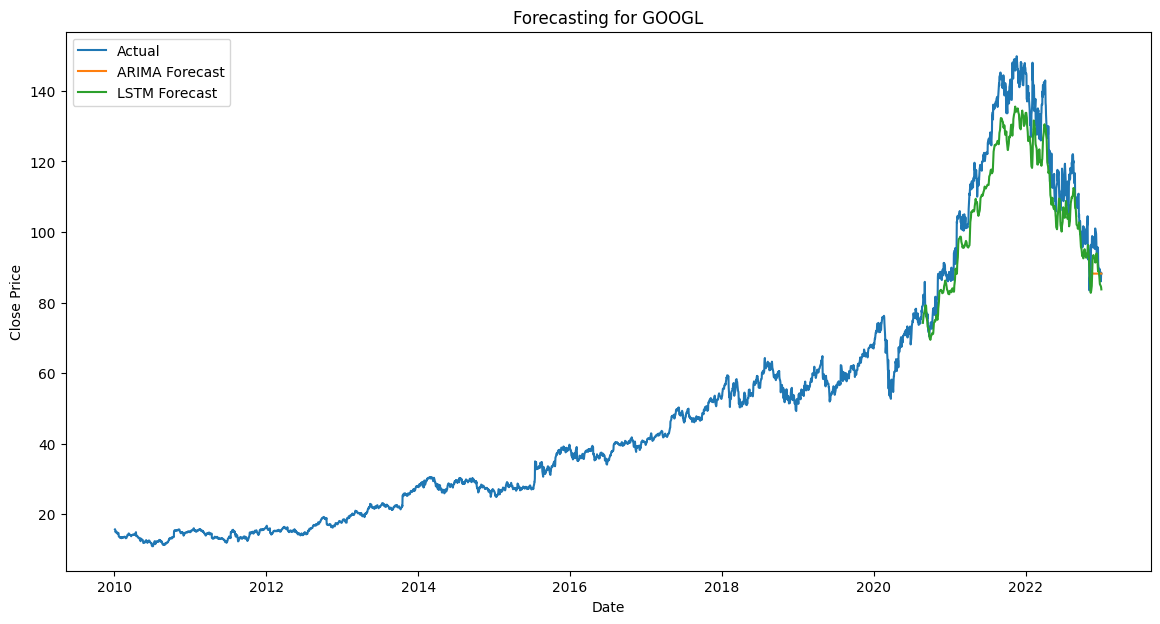

In [23]:
# Visualization for each stock
for ticker, data in processed_data_dict.items():
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Actual')
    plt.plot(data.index[-30:], arima_forecasts[ticker], label='ARIMA Forecast')
    plt.plot(data.index[-len(lstm_forecasts[ticker]):], lstm_forecasts[ticker], label='LSTM Forecast')
    plt.title(f'Forecasting for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()